In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Walmart DataSet.csv",parse_dates=['Date'], dayfirst=True)

In [3]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.duplicated().sum()

0

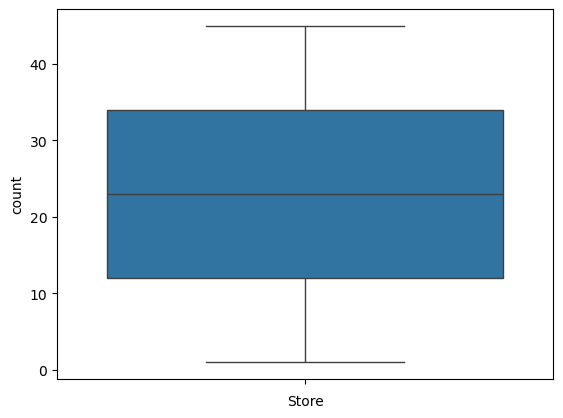

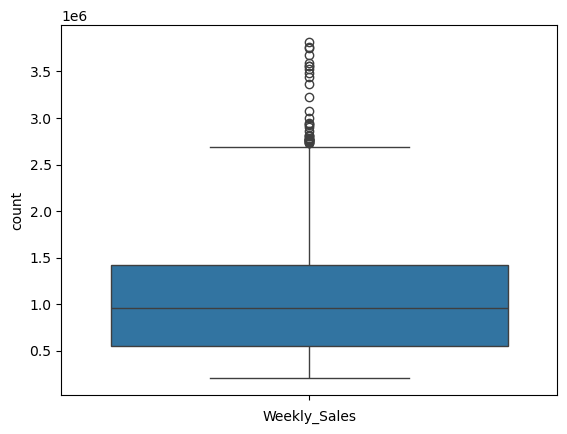

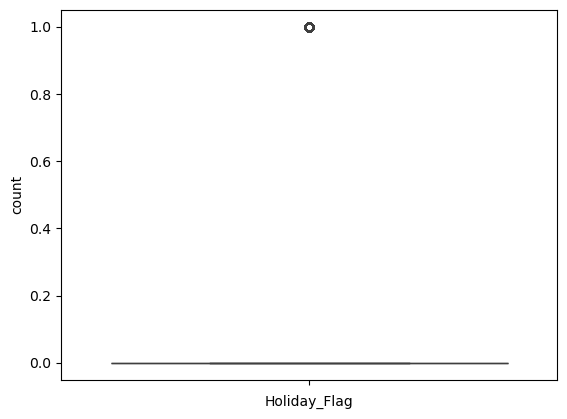

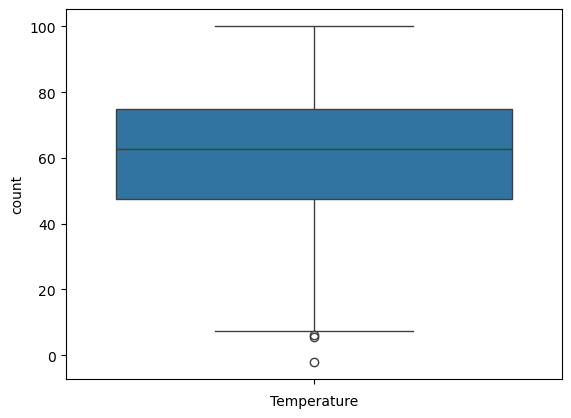

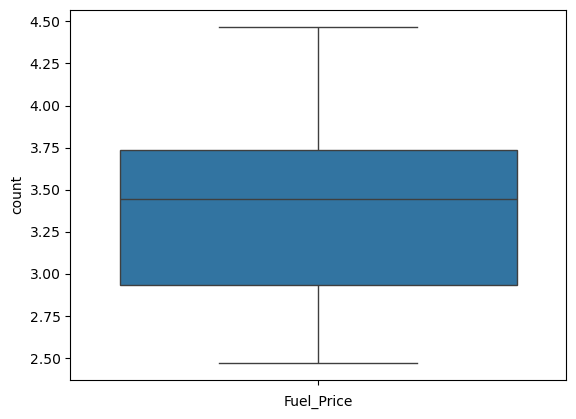

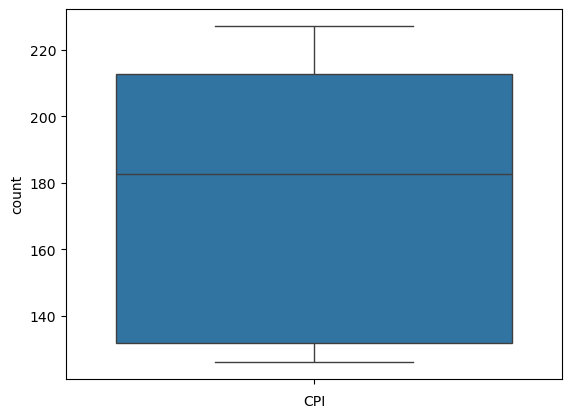

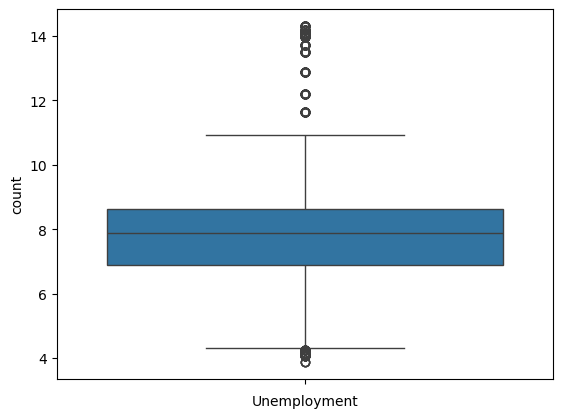

In [7]:
col=data.columns
col=col.drop("Date")
for c in col:
    sns.boxplot(data[c])
    plt.xlabel(c)
    plt.ylabel('count')
    plt.show()

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Count'>

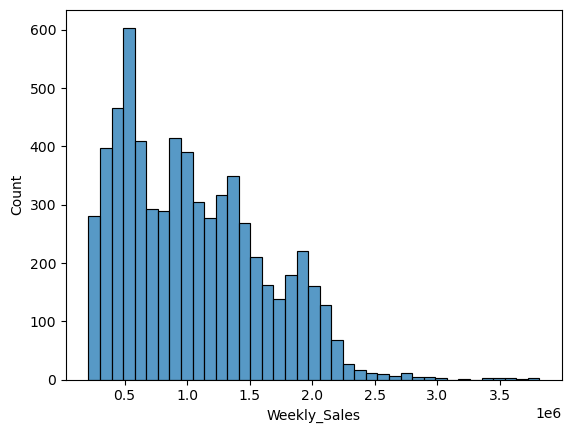

In [8]:
sns.histplot(data["Weekly_Sales"])

<AxesSubplot:xlabel='Unemployment', ylabel='Count'>

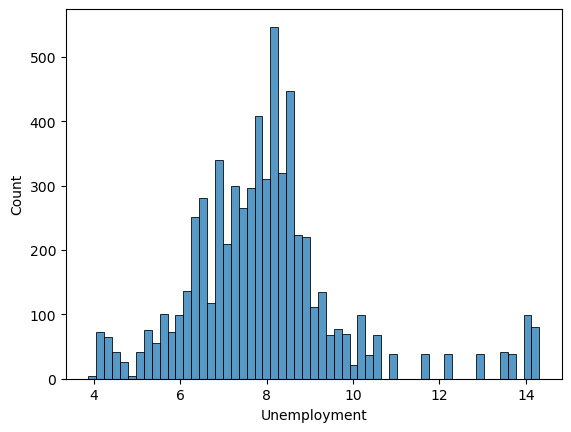

In [9]:
sns.histplot(data["Unemployment"])

In [10]:
# Data is timeseries so we cannot handle outliers since data is for different stores across weeks.If we remove outliers
# important information regarding that store is lost for a week

# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [11]:
from scipy.stats import pearsonr

#null hypothesis states that there is no correlation between the variables, 
#alternative hypothesis states that there is a correlation.

correlation_coefficient, p_value = pearsonr(data['Unemployment'], data['Weekly_Sales'])

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


The correlation is statistically significant.


In [12]:
store_correlations = {}
p_values = {}
unique_stores = data['Store'].unique()

for store in unique_stores:
    store_data = data[data['Store'] == store]
    correlation, p_value = pearsonr(store_data['Unemployment'], store_data['Weekly_Sales'])
    store_correlations[store] = correlation
    p_values[store] = p_value

# Create a DataFrame from the results
correlation_df = pd.DataFrame({
    'Store': unique_stores,
    'Correlation': [store_correlations[store] for store in unique_stores],
    'p-value': [p_values[store] for store in unique_stores]
})

# Apply a significance level (e.g., 0.05)
alpha = 0.05

# Identify statistically significant correlations
significant_correlations = correlation_df[correlation_df['p-value'] < alpha]

print("Statistically significant correlations:")
print(significant_correlations)
print(len(significant_correlations))

Statistically significant correlations:
    Store  Correlation       p-value
2       3    -0.230413  5.631340e-03
3       4    -0.337015  3.858223e-05
4       5    -0.207043  1.309827e-02
6       7    -0.165382  4.838919e-02
8       9    -0.191534  2.193021e-02
12     13    -0.171633  4.039835e-02
13     14     0.210786  1.150496e-02
16     17    -0.263600  1.467766e-03
20     21     0.218367  8.791075e-03
29     30     0.201862  1.561988e-02
34     35     0.483865  9.236523e-10
35     36     0.833734  3.436607e-38
36     37    -0.221287  7.907592e-03
37     38    -0.785290  3.721186e-31
38     39    -0.384681  2.099708e-06
40     41    -0.350630  1.760959e-05
41     42    -0.356355  1.252380e-05
42     43    -0.201954  1.557159e-02
43     44    -0.780076  1.654147e-30
19


C:\Users\Admin\AppData\Local\Temp\ipykernel_26844\1383347266.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_correlations = data.groupby('Store')['Unemployment', 'Weekly_Sales'].corr().loc[(slice(None), 'Unemployment'), 'Weekly_Sales'].reset_index()


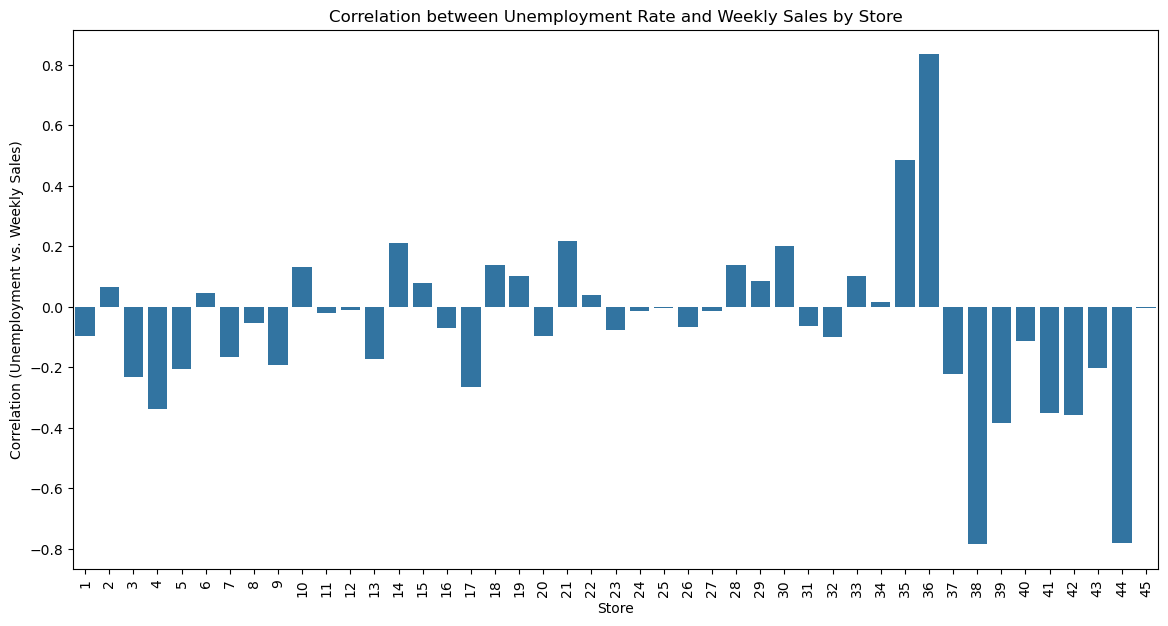

In [13]:
store_correlations = data.groupby('Store')['Unemployment', 'Weekly_Sales'].corr().loc[(slice(None), 'Unemployment'), 'Weekly_Sales'].reset_index()
    
# Visualization: Bar plot of store correlations
plt.figure(figsize=(14, 7))
sns.barplot(data=store_correlations, x='Store', y='Weekly_Sales')
plt.xlabel('Store')
plt.ylabel('Correlation (Unemployment vs. Weekly Sales)')
plt.title('Correlation between Unemployment Rate and Weekly Sales by Store')
plt.xticks(rotation=90)
plt.show()

In [14]:
print("Stores suffering the most due to Unemployment:")
store_correlations.sort_values(by='Weekly_Sales', ascending=True).reset_index().head(5)



Stores suffering the most due to Unemployment:


,index,Store,level_1,Weekly_Sales
0,37,38,Unemployment,-0.785290
1,43,44,Unemployment,-0.780076
2,38,39,Unemployment,-0.384681
3,41,42,Unemployment,-0.356355
4,40,41,Unemployment,-0.350630


# b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
df=data.groupby("Date")

In [17]:
total_weekly_sales = df.agg(total_sales = ("Weekly_Sales", sum))
result = seasonal_decompose(total_weekly_sales['total_sales'], model='additive', period=52)

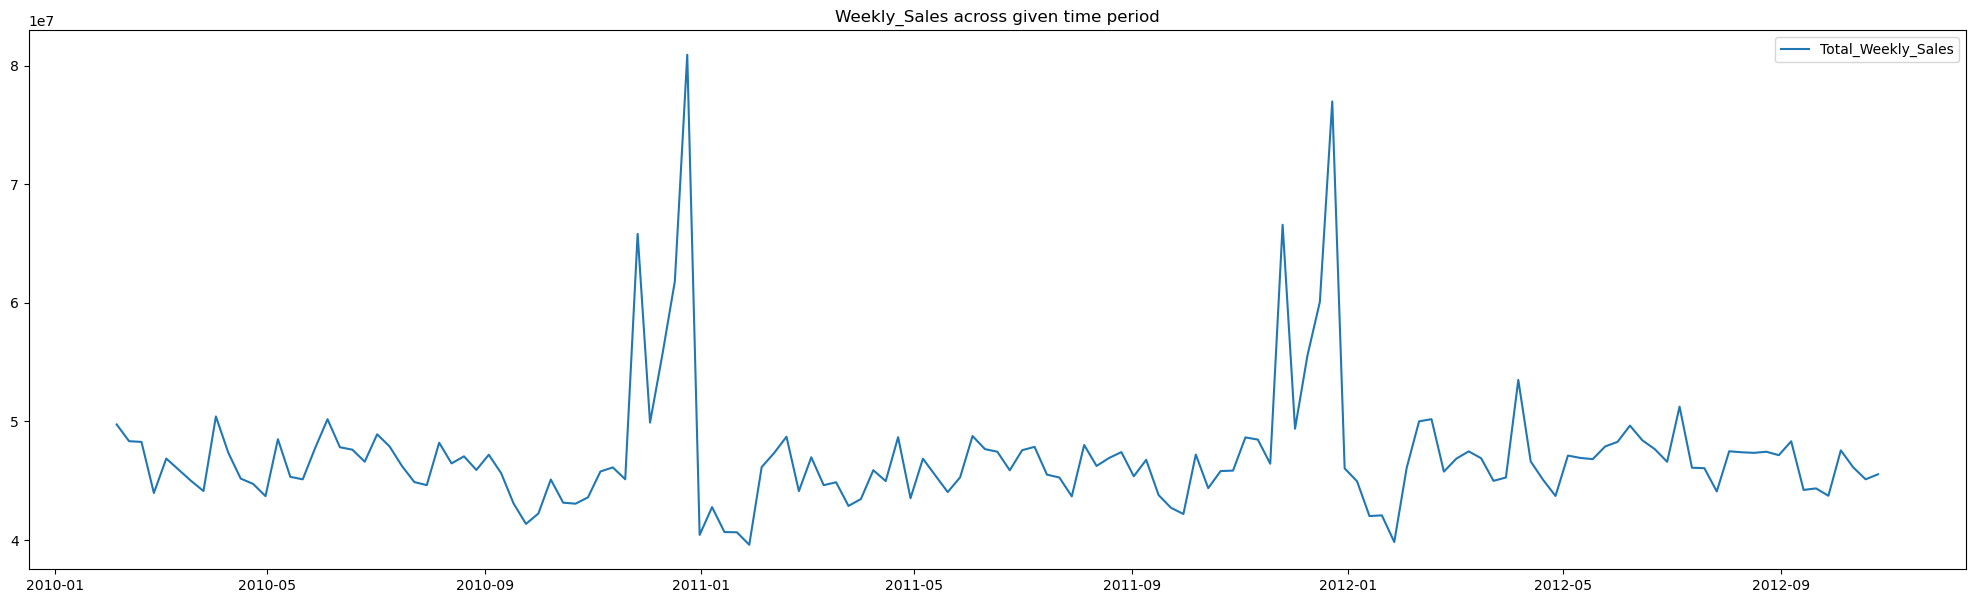

In [18]:
plt.figure(figsize=(25, 7))
plt.plot(total_weekly_sales.index, total_weekly_sales["total_sales"], label="Total_Weekly_Sales")
plt.title("Weekly_Sales across given time period")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

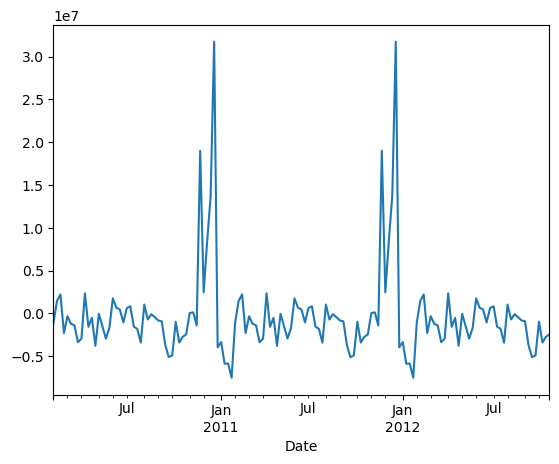

In [19]:
result.seasonal.plot()

In [20]:
# Visualization and Seasonal decmposition show that the sales goes high at the year end in months of October to December. 
# Sales is highest in december due to chritsmas sale and festival offers.

# c. Does temperature affect the weekly sales in any manner?

In [21]:
correlation_coefficient, p_value = pearsonr(data['Weekly_Sales'], data['Temperature'])

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

The correlation is statistically significant.


C:\Users\Admin\AppData\Local\Temp\ipykernel_26844\3276695621.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_correlations = data.groupby('Store')['Temperature', 'Weekly_Sales'].corr().loc[(slice(None), 'Temperature'), 'Weekly_Sales'].reset_index()


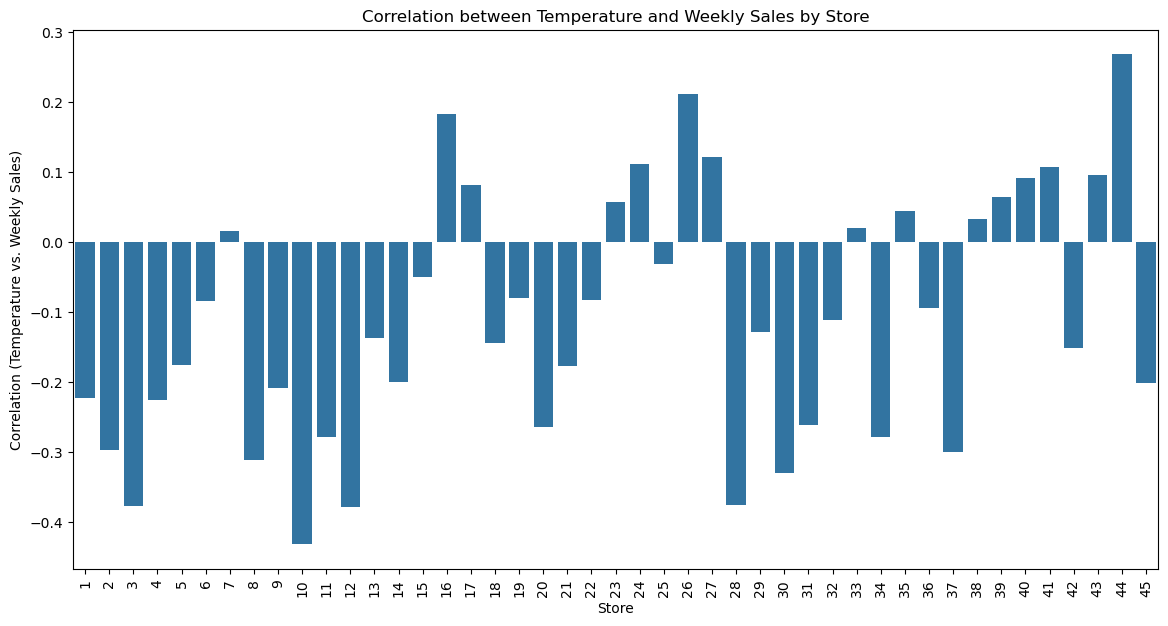

In [22]:
store_correlations = data.groupby('Store')['Temperature', 'Weekly_Sales'].corr().loc[(slice(None), 'Temperature'), 'Weekly_Sales'].reset_index()
    
# Visualization: Bar plot of store correlations
plt.figure(figsize=(14, 7))
sns.barplot(data=store_correlations, x='Store', y='Weekly_Sales')
plt.xlabel('Store')
plt.ylabel('Correlation (Temperature vs. Weekly Sales)')
plt.title('Correlation between Temperature and Weekly Sales by Store')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Most of the stores show a -ve corr between Temperature and Weekly Sales. So as temp increases sales decreases for them.

# d. How is the Consumer Price index affecting the weekly sales of various stores?

In [24]:
correlation_coefficient, p_value = pearsonr(data['Weekly_Sales'], data['CPI'])

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

The correlation is statistically significant.


C:\Users\Admin\AppData\Local\Temp\ipykernel_26844\261554015.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_correlations = data.groupby('Store')['CPI', 'Weekly_Sales'].corr().loc[(slice(None), 'CPI'), 'Weekly_Sales'].reset_index()


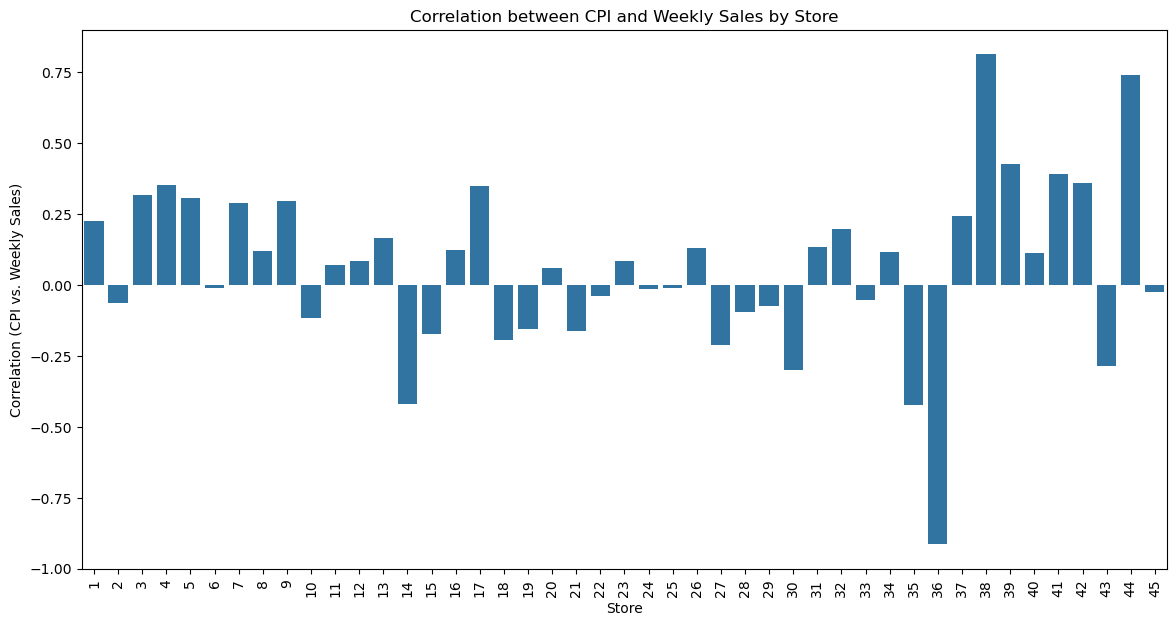

In [25]:
store_correlations = data.groupby('Store')['CPI', 'Weekly_Sales'].corr().loc[(slice(None), 'CPI'), 'Weekly_Sales'].reset_index()
    
# Visualization: Bar plot of store correlations
plt.figure(figsize=(14, 7))
sns.barplot(data=store_correlations, x='Store', y='Weekly_Sales')
plt.xlabel('Store')
plt.ylabel('Correlation (CPI vs. Weekly Sales)')
plt.title('Correlation between CPI and Weekly Sales by Store')
plt.xticks(rotation=90)
plt.show()

In [26]:
print("Stores showing -ve corr with CPI:")
store_correlations[store_correlations["Weekly_Sales"]<0].sort_values(by="Weekly_Sales")


Stores showing -ve corr with CPI:


,Store,level_1,Weekly_Sales
35,36,CPI,-0.915095
34,35,CPI,-0.424107
13,14,CPI,-0.419755
29,30,CPI,-0.298188
42,43,CPI,-0.285686
26,27,CPI,-0.213082
17,18,CPI,-0.193541
14,15,CPI,-0.174467
20,21,CPI,-0.163649
18,19,CPI,-0.155341


In [27]:
print("Stores showing +ve corr with CPI:")
store_correlations[store_correlations["Weekly_Sales"]>0].sort_values(by="Weekly_Sales",ascending=False)

Stores showing +ve corr with CPI:


,Store,level_1,Weekly_Sales
37,38,CPI,0.812837
43,44,CPI,0.740150
38,39,CPI,0.428043
40,41,CPI,0.392293
41,42,CPI,0.360859
3,4,CPI,0.351157
16,17,CPI,0.348571
2,3,CPI,0.317250
4,5,CPI,0.308261
8,9,CPI,0.294805


# e. Top performing stores according to the historical data.

In [28]:
df=data.groupby("Store")
# Calculate total weekly sales for each store
store_total_sales = df.agg(Total_Sales=('Weekly_Sales',sum))

top_stores= store_total_sales.sort_values(by="Total_Sales",ascending=False).reset_index()
top_stores.head(5)

,Store,Total_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08


C:\Users\Admin\AppData\Local\Temp\ipykernel_26844\1844577662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Store", y="Total_Sales", data=top_stores, palette='viridis', order=top_stores["Store"])


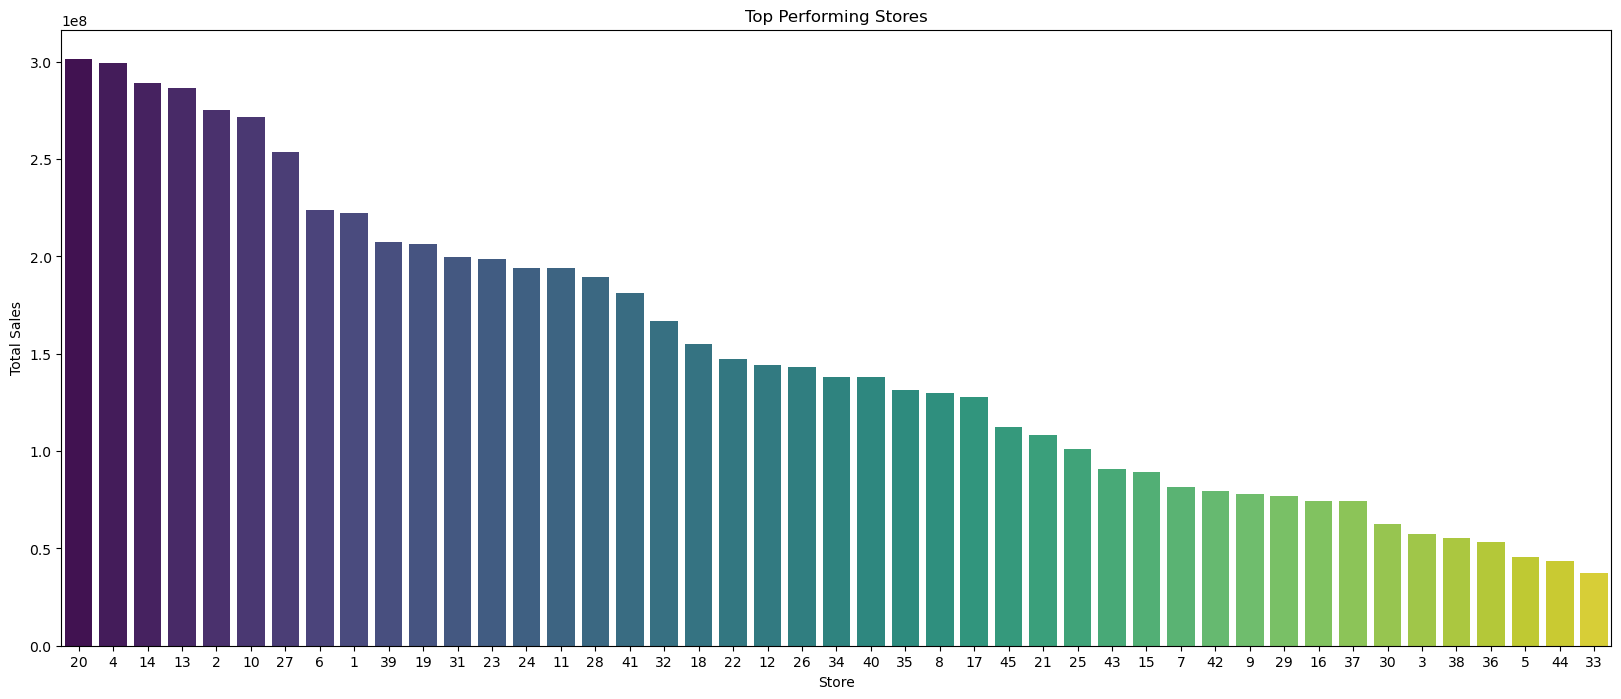

In [29]:
plt.figure(figsize=(20,8))
sns.barplot(x="Store", y="Total_Sales", data=top_stores, palette='viridis', order=top_stores["Store"])
plt.title('Top Performing Stores')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks()
plt.show()

# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [30]:
bottom_stores= store_total_sales.sort_values(by="Total_Sales",ascending=True).reset_index()

In [31]:
bottom_stores.head(5)

,Store,Total_Sales
0,33,37160221.96
1,44,43293087.84
2,5,45475688.90
3,36,53412214.97
4,38,55159626.42


In [32]:
worst_performing_store = bottom_stores["Store"][0]

# Find the best performing store
best_performing_store = top_stores["Store"][0]

# Calculate the difference between best and worst performing stores
sales_difference = top_stores["Total_Sales"][0] - bottom_stores["Total_Sales"][0]

# Display the results
print(f"Worst performing store: {worst_performing_store}")
print(f"Best performing store: {best_performing_store}")
print(f"Difference between best and worst performing stores total sales: {sales_difference}")

Worst performing store: 33
Best performing store: 20
Difference between best and worst performing stores total sales: 264237570.49999997


In [33]:
import scipy.stats as stats

worst_store_sales=data[data["Store"]==worst_performing_store]["Weekly_Sales"]
best_store_sales=data[data["Store"]==best_performing_store]["Weekly_Sales"]
t_statistic, p_value = stats.ttest_ind(worst_store_sales,best_store_sales)

# Set significance level
alpha = 0.05

# Display the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < alpha:
    print("The difference in sales between best and worst performing stores is statistically significant.")
else:
    print("The difference in sales between best and worst performing stores is not statistically significant.")

T-Statistic: -79.7845693614103
P-Value: 1.6548468656243e-196
The difference in sales between best and worst performing stores is statistically significant.


# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [34]:
from statsmodels.tsa.stattools import adfuller

stationary_stores=[]
non_stationary_stores=[]
store_numbers = data['Store'].unique()

# Define the significance level
alpha = 0.05

# Perform ADF test for each store
for store_number in store_numbers:
    store_data = data[data['Store'] == store_number]['Weekly_Sales']
    
    # Perform ADF test
    result = adfuller(store_data)
    p_value = result[1]
    
    if p_value < alpha:
        stationary_stores.append(store_number)
    else:
        non_stationary_stores.append(store_number)

In [35]:
non_stationary_stores

[14, 30, 36, 38, 42, 43, 44]

In [36]:
print(stationary_stores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 39, 40, 41, 45]


In [37]:
s1_data=data[data['Store'] == 1][['Date','Weekly_Sales']]

In [38]:
s1_data.set_index('Date',inplace=True)

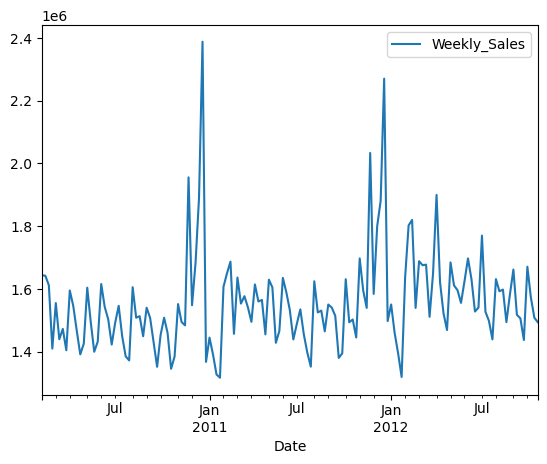

In [39]:
s1_data.plot();

In [40]:
s1_data

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


In [62]:
from pmdarima import auto_arima
order=auto_arima(s1_data)
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1897.843
Date:                Fri, 01 Dec 2023   AIC                           3807.686
Time:                        18:55:52   BIC                           3825.421
Sample:                    02-05-2010   HQIC                          3814.893
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.015       0.055       0.518
ma.L2         -0.3357      0.109     -3.090      0.002      -0.549      -0.123
ma.L3         -0.6403      0.067     -9.574      0.000      -0.771      -0.509
sigma2      2.408e+10   4.97e-12   4.85e+21      0.000    2.41e+10    2.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                44.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.77
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.09e+37. Standard errors may be unstable.
"""

In [42]:
order.order

(2, 1, 3)

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [81]:
model=SARIMAX(s1_data,order=(2, 1, 3),seasonal_order=(2, 1, 3 ,52),enforce_invertibility=False,enforce_stationarity=False)
model=model.fit()

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [82]:
forecast=model.forecast(steps=12)

In [83]:
forecast

2012-11-02    1.762862e+06
2012-11-09    1.648378e+06
2012-11-16    1.595471e+06
2012-11-23    2.089915e+06
2012-11-30    1.640089e+06
2012-12-07    1.855845e+06
2012-12-14    1.937355e+06
2012-12-21    2.326339e+06
2012-12-28    1.553622e+06
2013-01-04    1.606529e+06
2013-01-11    1.515759e+06
2013-01-18    1.450553e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

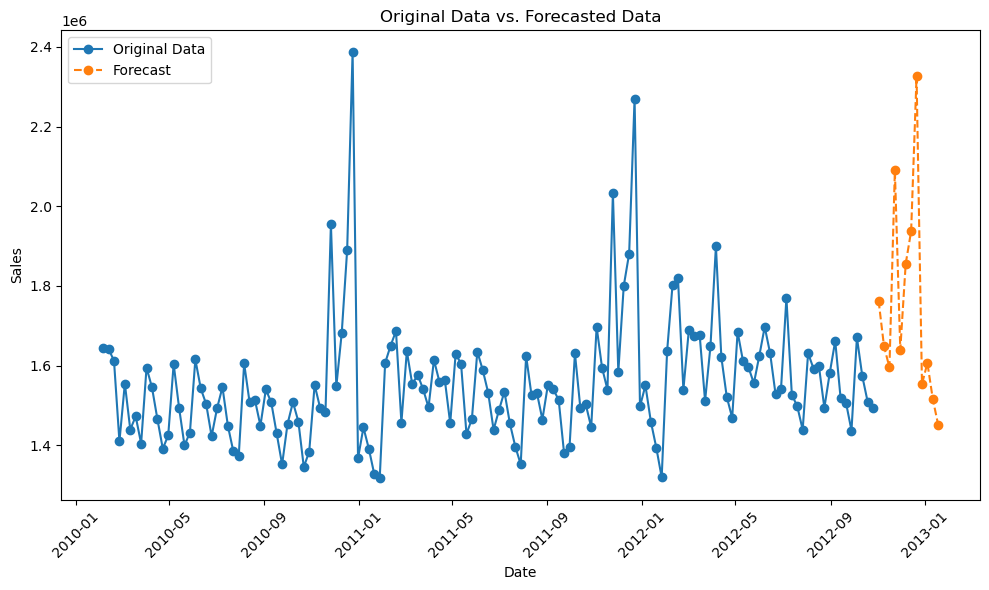

In [84]:
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(s1_data.index, s1_data['Weekly_Sales'], label='Original Data', marker='o', linestyle='-')

# Plot forecasted data
plt.plot(forecast.index, forecast, label='Forecast', marker='o', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Data vs. Forecasted Data')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [88]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
forecast_df = pd.DataFrame()

for store in range(1,46):
    s_data=data[data['Store'] == store][['Date','Weekly_Sales']]
    s_data.set_index('Date',inplace=True)
    
    order=auto_arima(s_data)
    od=order.order
    model=SARIMAX(s_data,order=od,seasonal_order=od +(52,),
                  enforce_invertibility=False,enforce_stationarity=False)
    model=model.fit()
    
    forecast=model.forecast(steps=12)
    forecast_df[store] = forecast

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\User

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sari

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\User

In [89]:
forecast_df[1]

2012-11-02    1.762862e+06
2012-11-09    1.648378e+06
2012-11-16    1.595471e+06
2012-11-23    2.089915e+06
2012-11-30    1.640089e+06
2012-12-07    1.855845e+06
2012-12-14    1.937355e+06
2012-12-21    2.326339e+06
2012-12-28    1.553622e+06
2013-01-04    1.606529e+06
2013-01-11    1.515759e+06
2013-01-18    1.450553e+06
Freq: W-FRI, Name: 1, dtype: float64

In [90]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2012-11-02 to 2013-01-18
Freq: W-FRI
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       12 non-null     float64
 1   2       12 non-null     float64
 2   3       12 non-null     float64
 3   4       12 non-null     float64
 4   5       12 non-null     float64
 5   6       12 non-null     float64
 6   7       12 non-null     float64
 7   8       12 non-null     float64
 8   9       12 non-null     float64
 9   10      12 non-null     float64
 10  11      12 non-null     float64
 11  12      12 non-null     float64
 12  13      12 non-null     float64
 13  14      12 non-null     float64
 14  15      12 non-null     float64
 15  16      12 non-null     float64
 16  17      12 non-null     float64
 17  18      12 non-null     float64
 18  19      12 non-null     float64
 19  20      12 non-null     float64
 20  21      12 non-null     float64
 21  22      1

C:\Users\Admin\AppData\Local\Temp\ipykernel_26844\3684253703.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


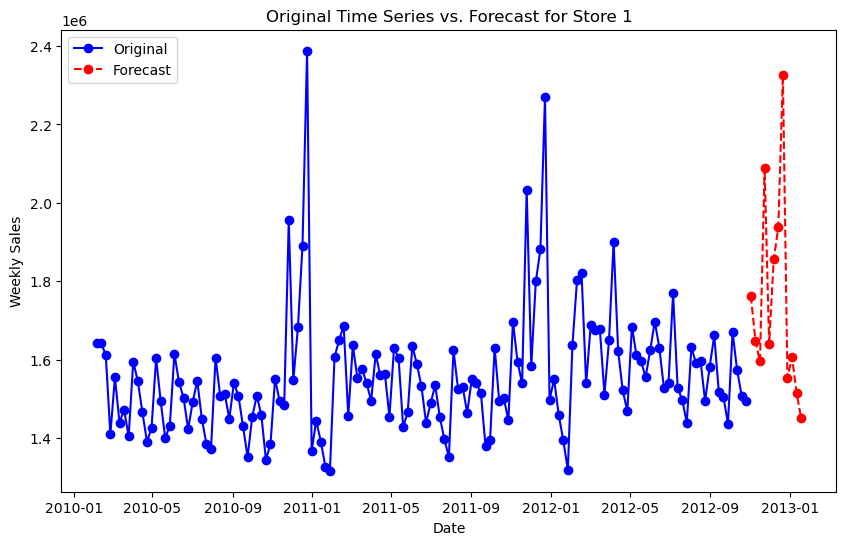

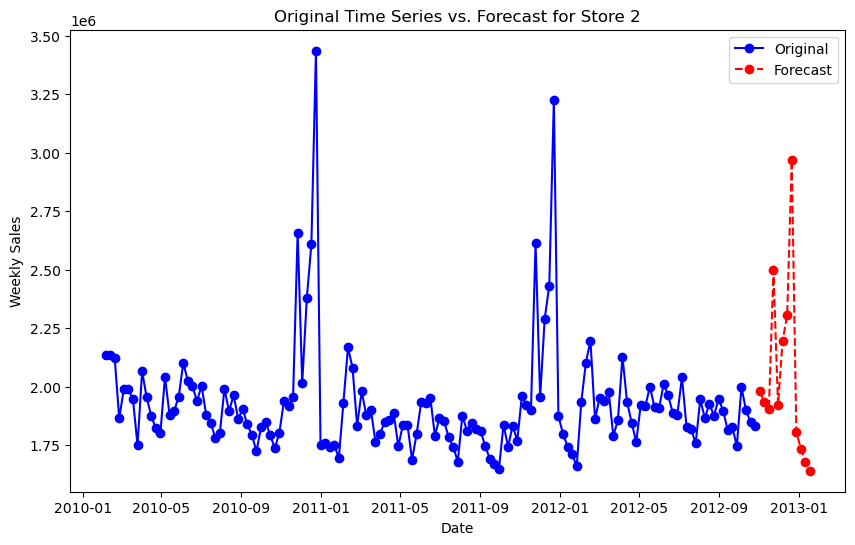

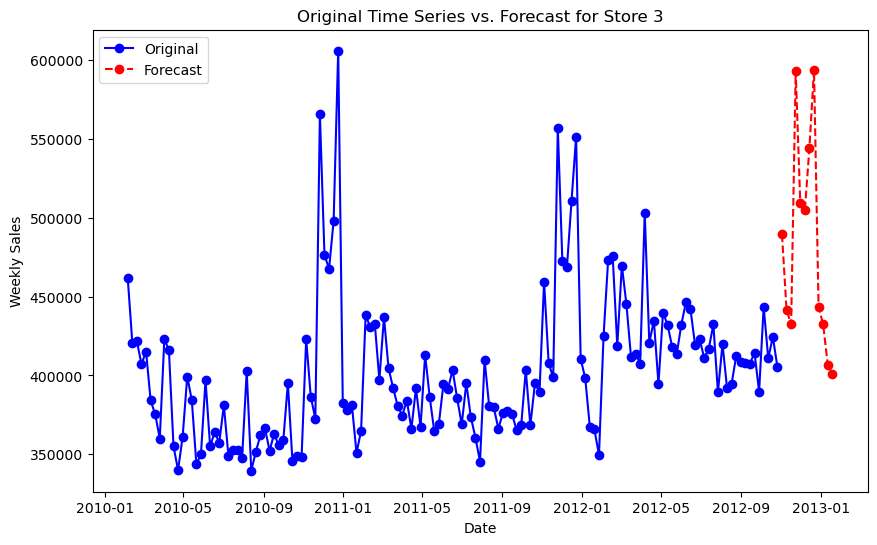

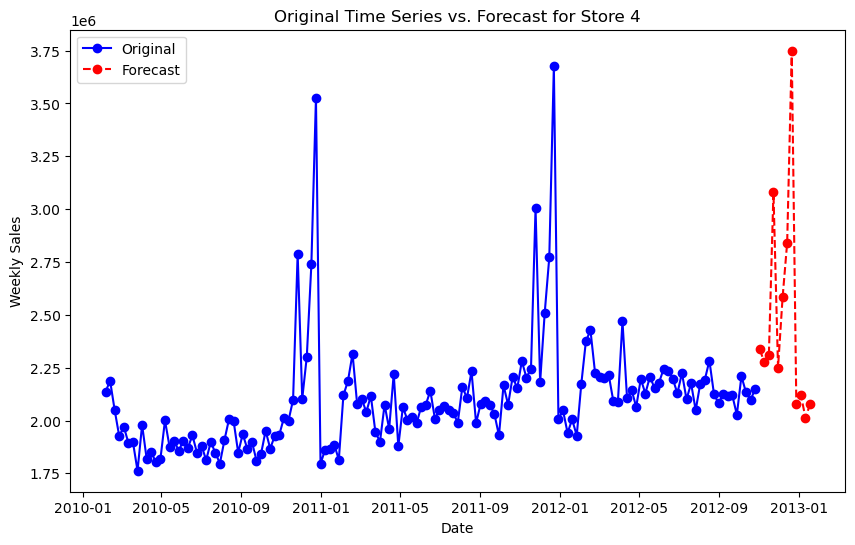

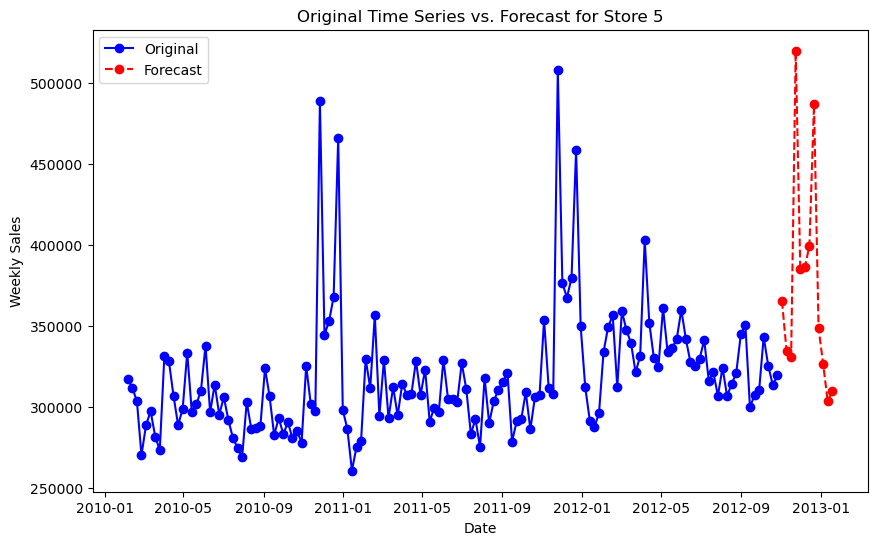

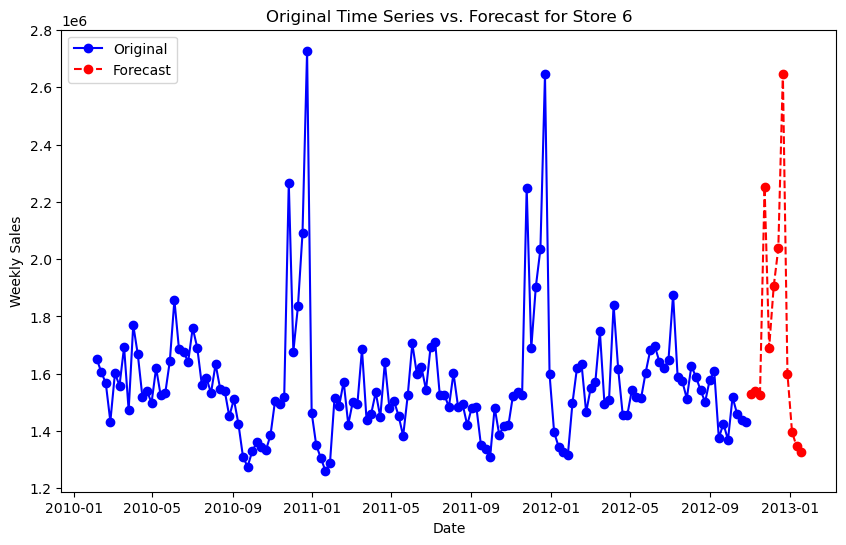

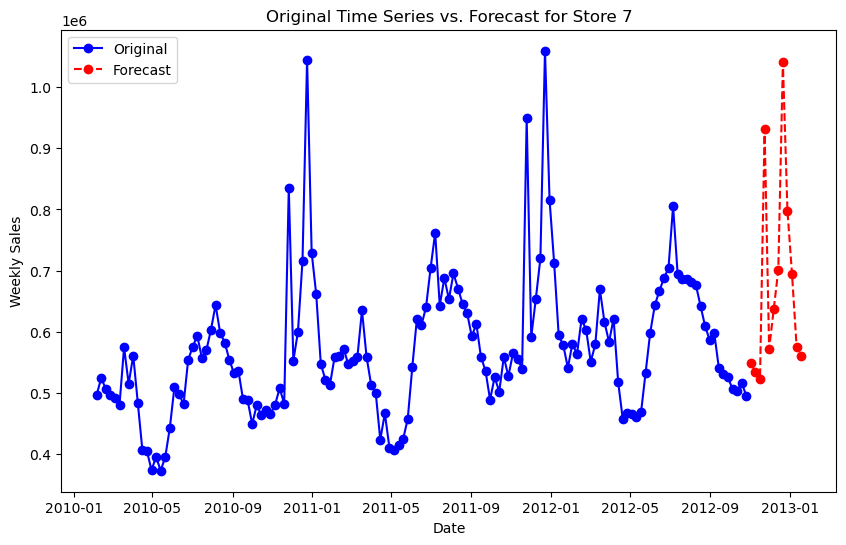

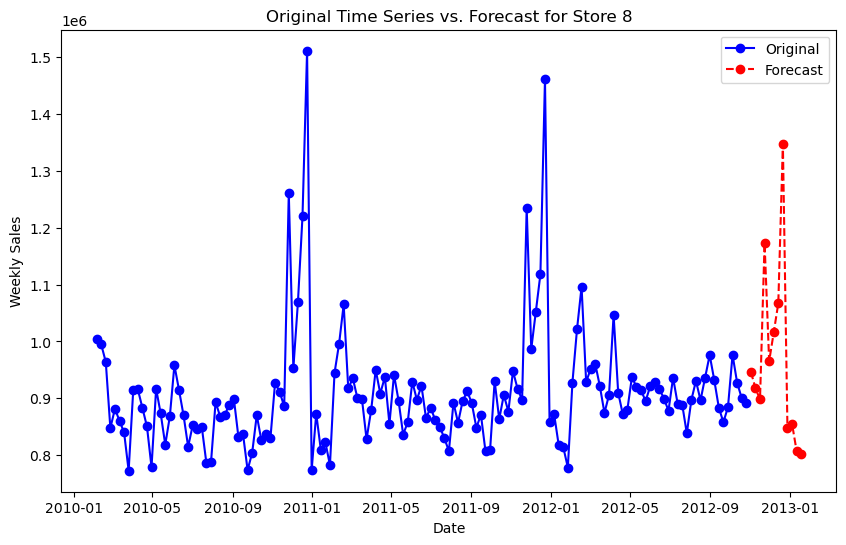

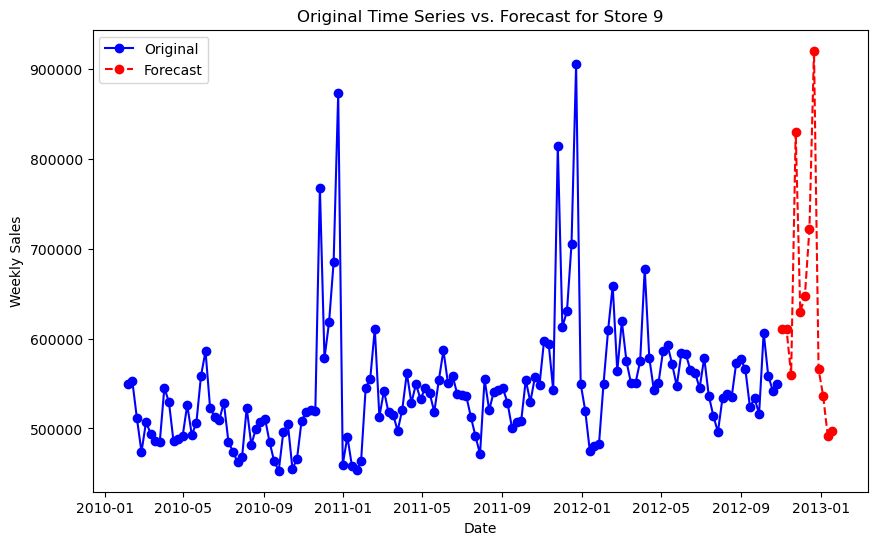

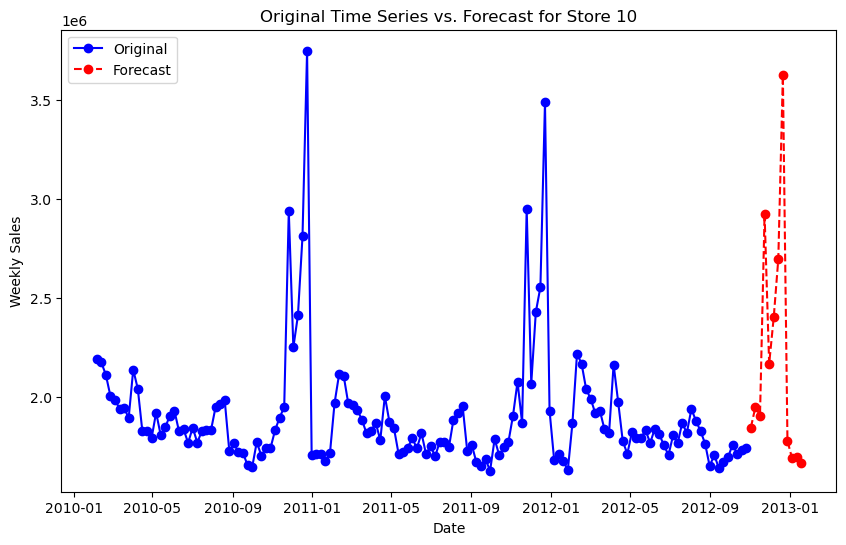

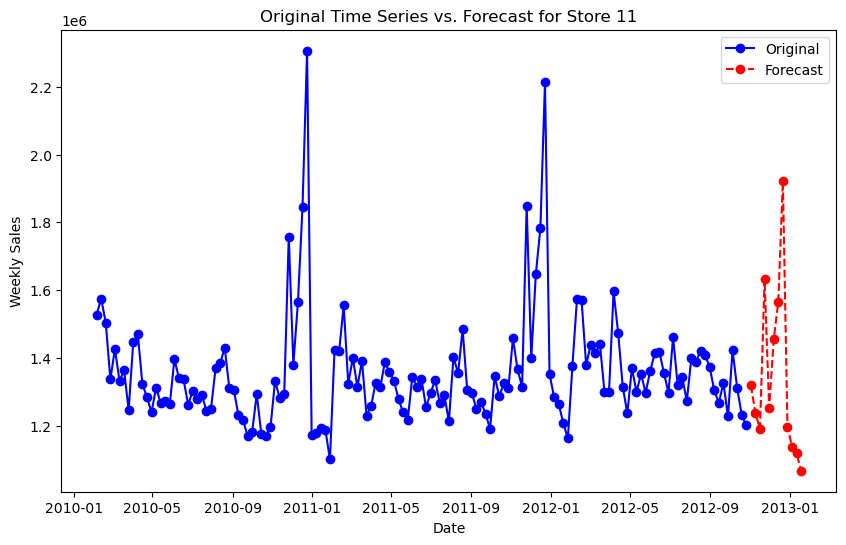

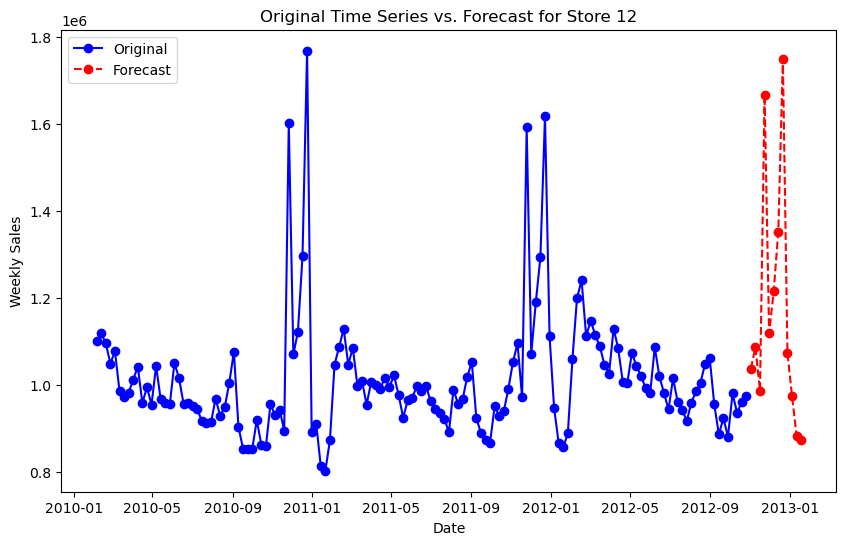

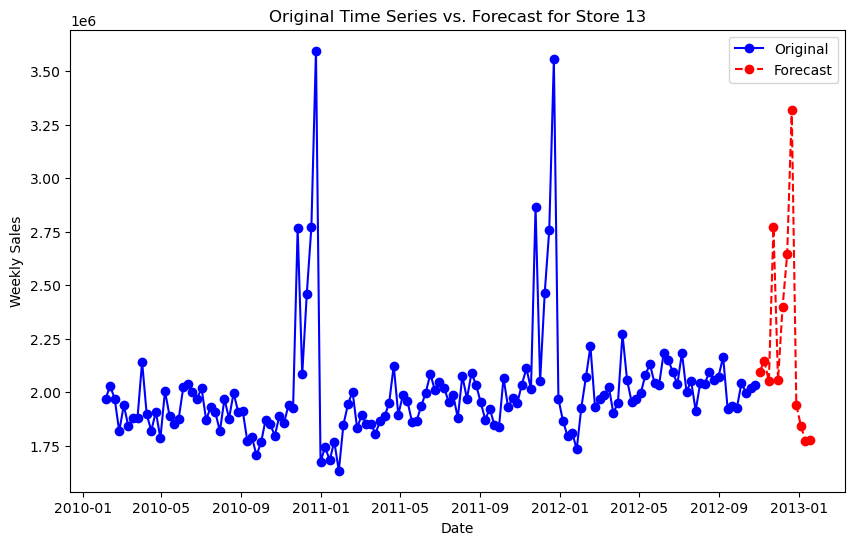

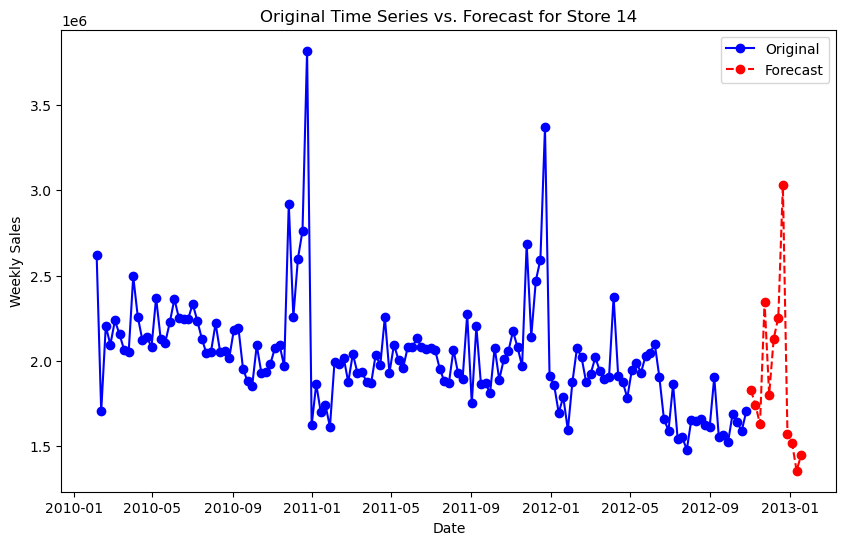

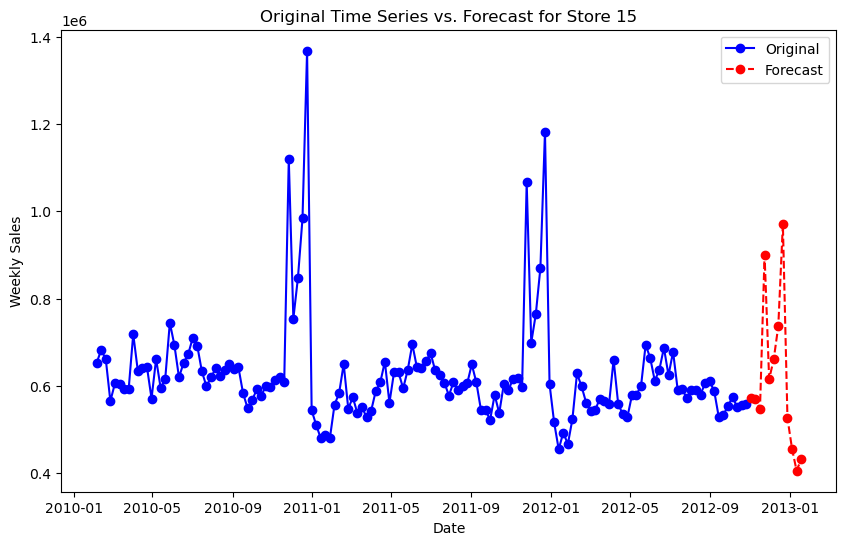

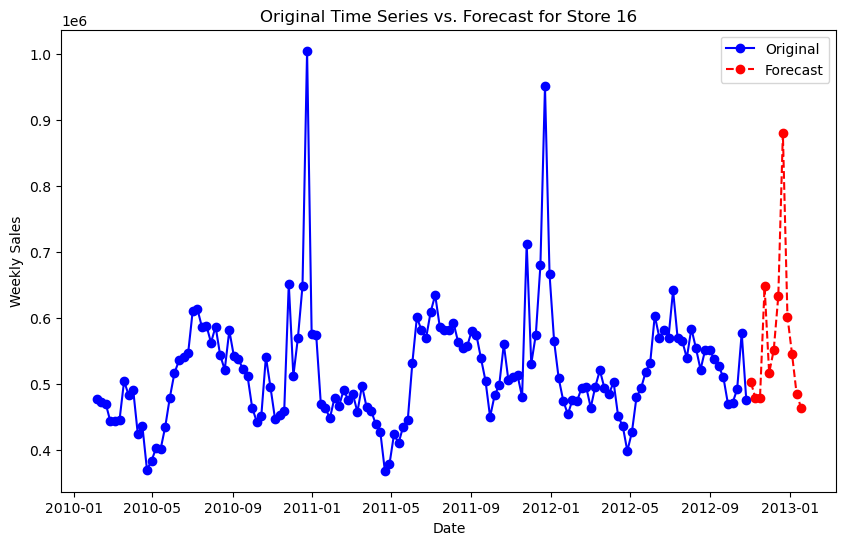

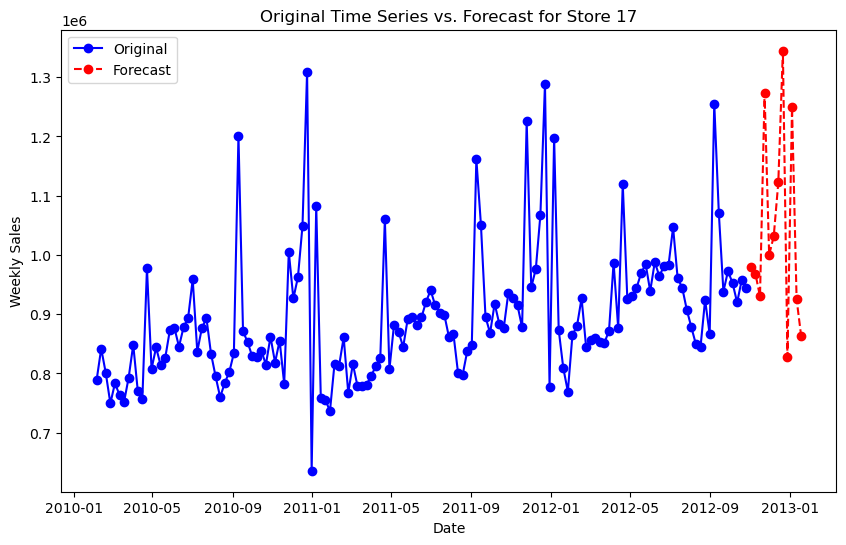

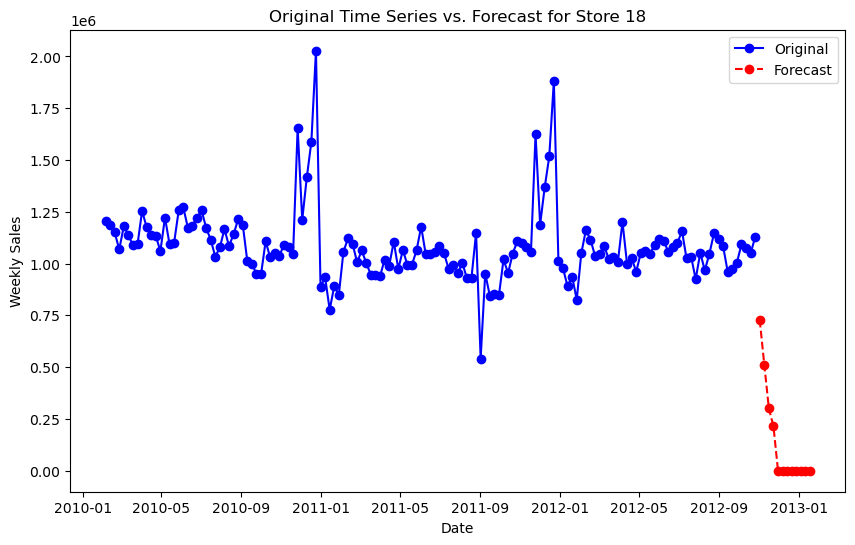

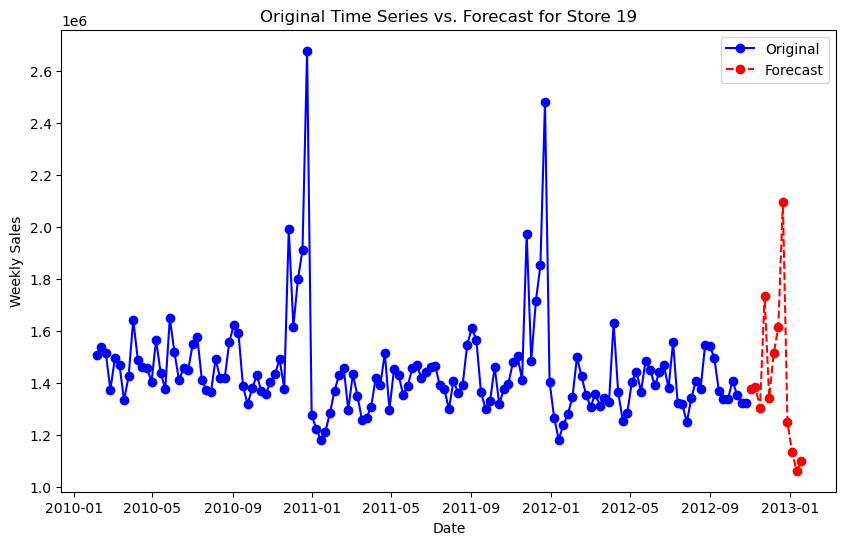

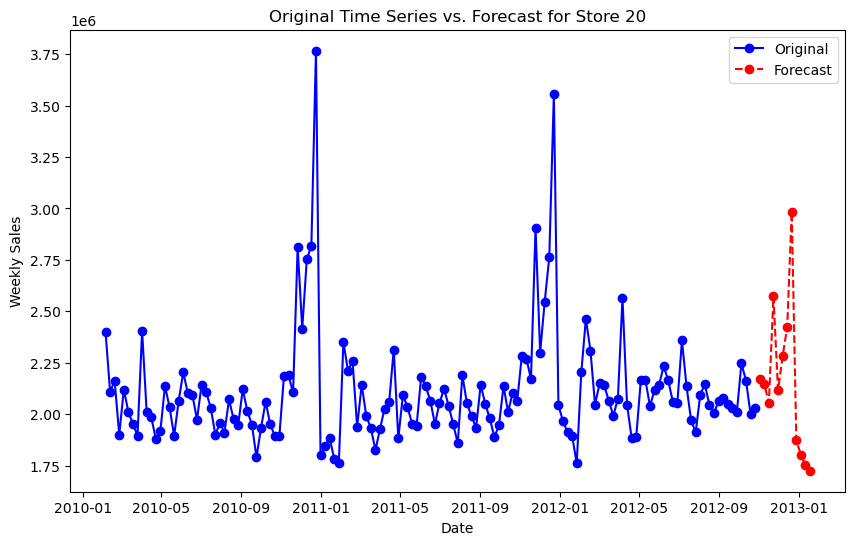

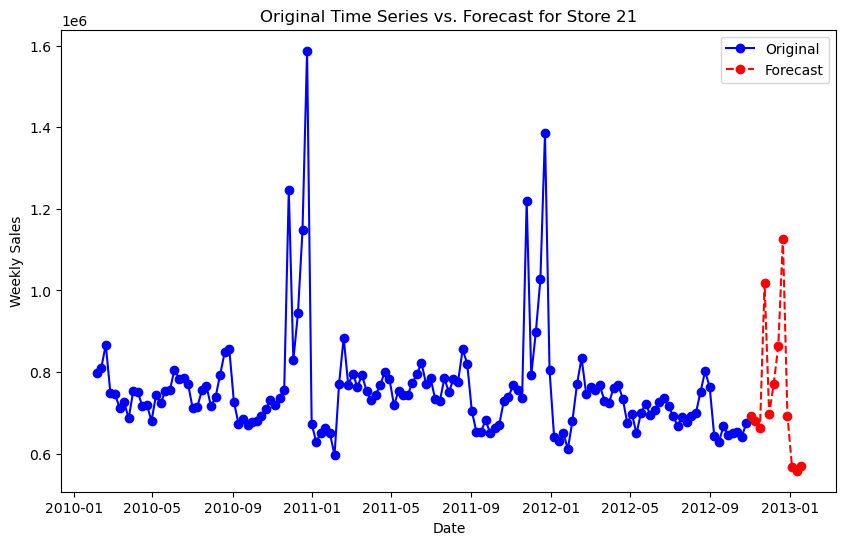

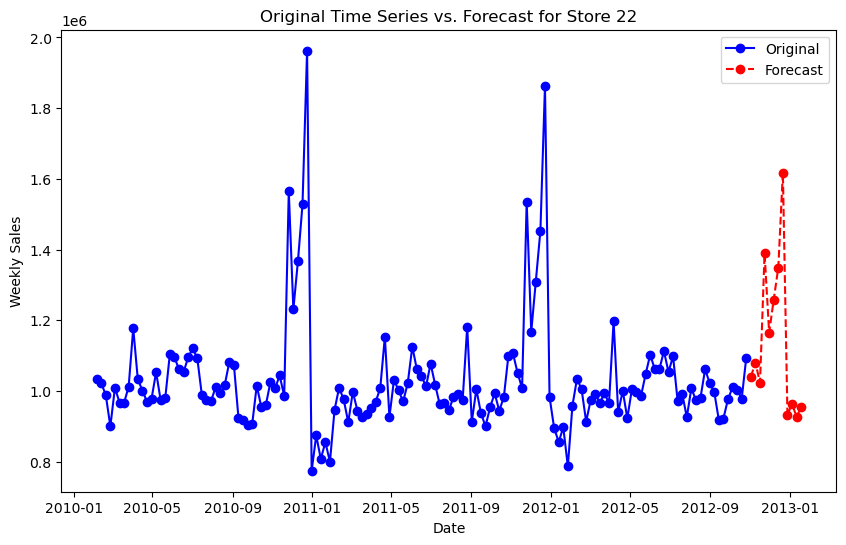

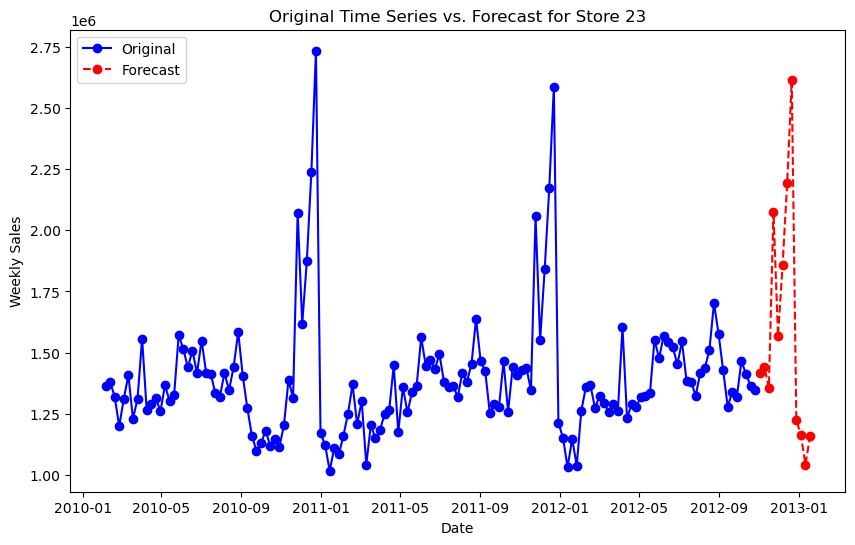

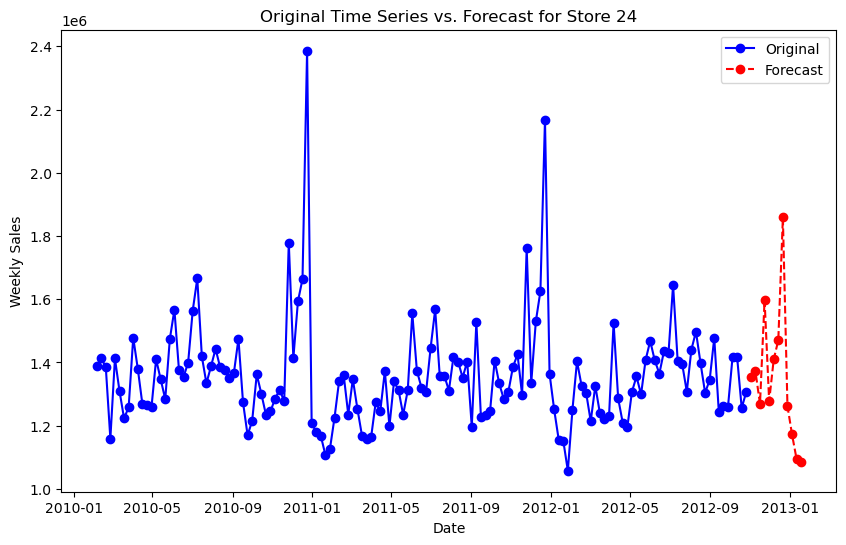

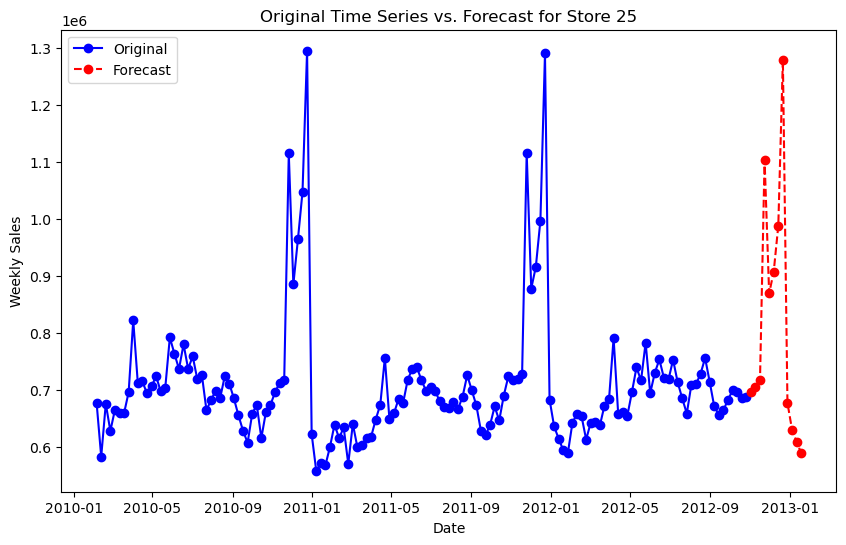

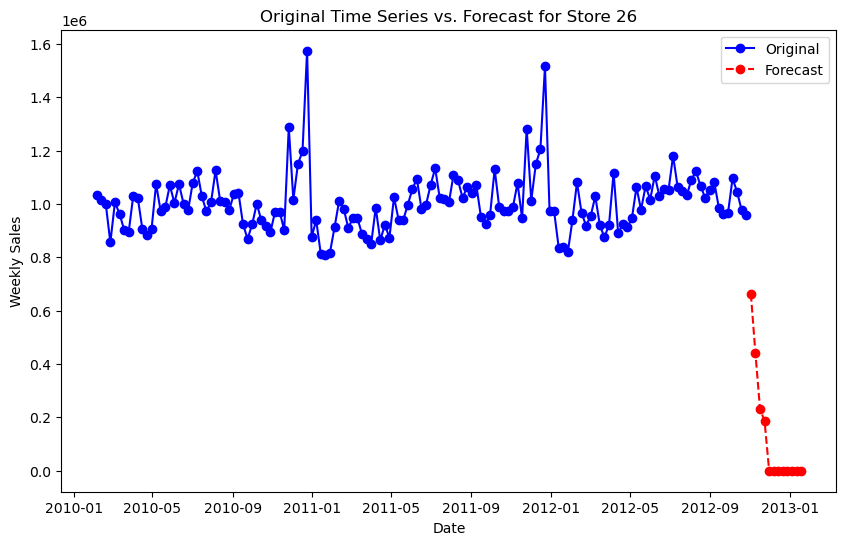

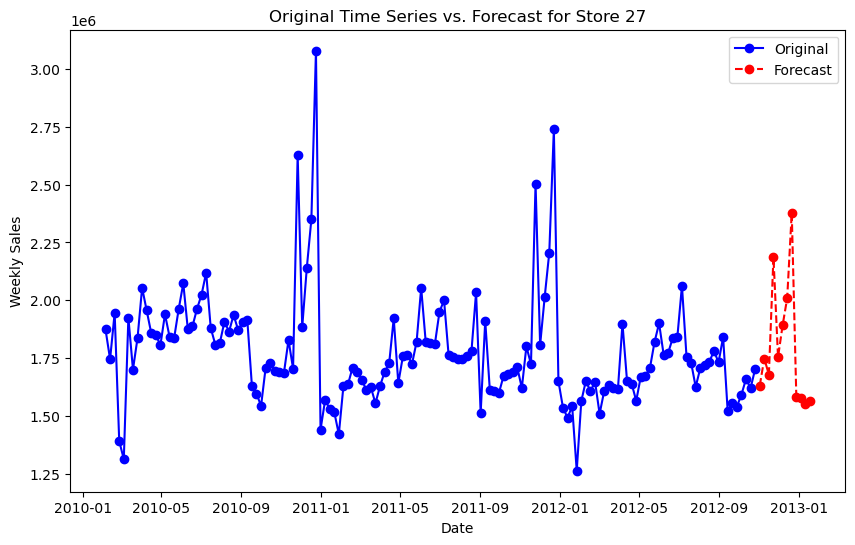

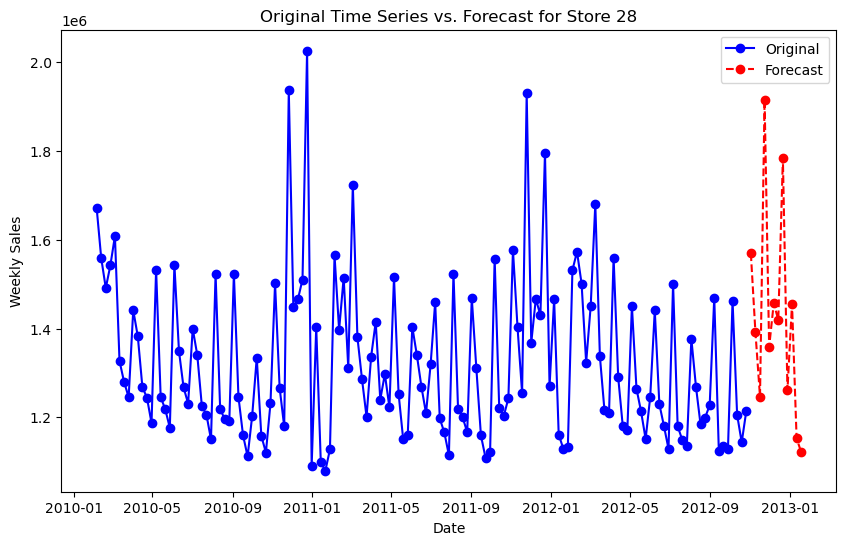

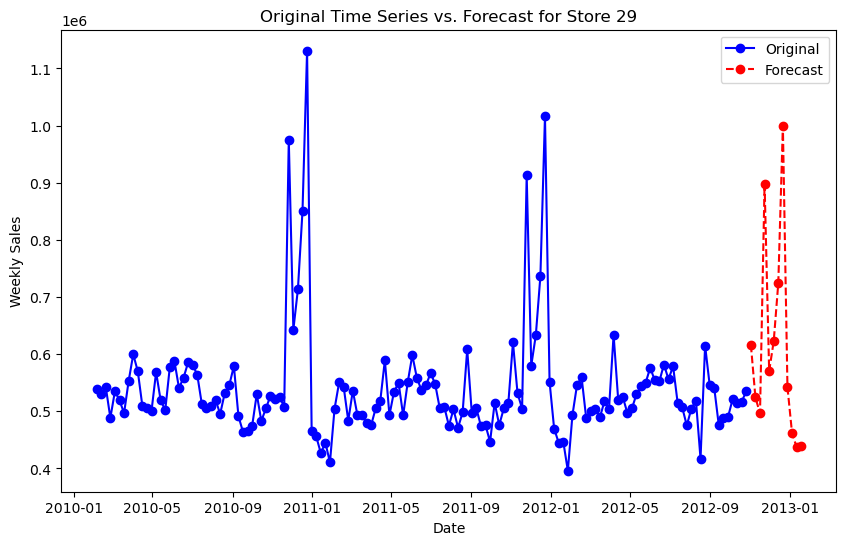

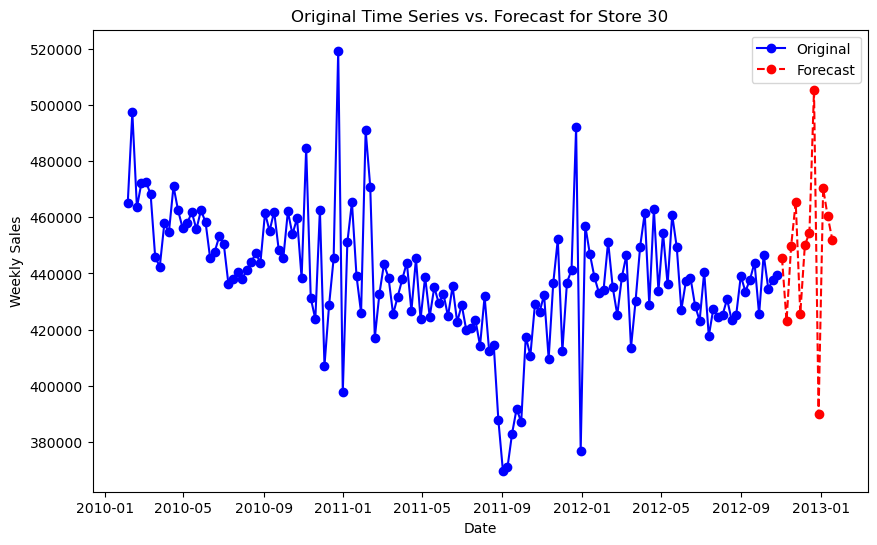

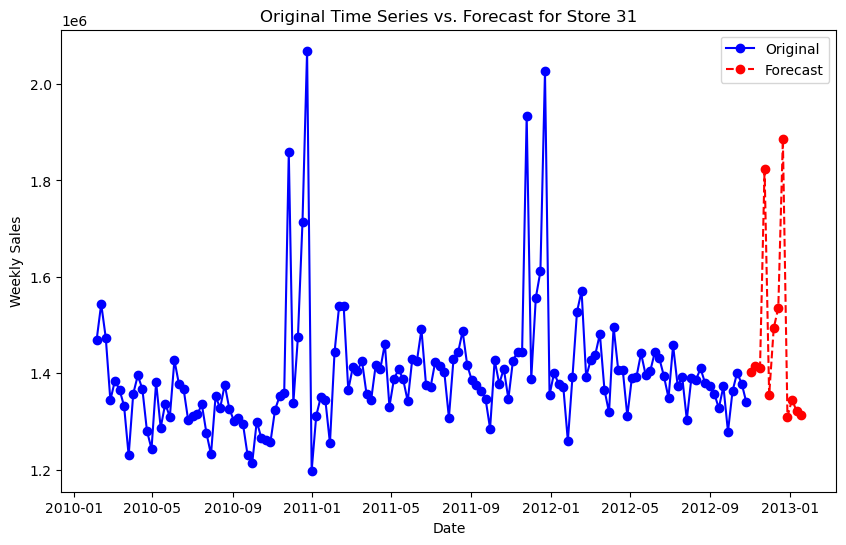

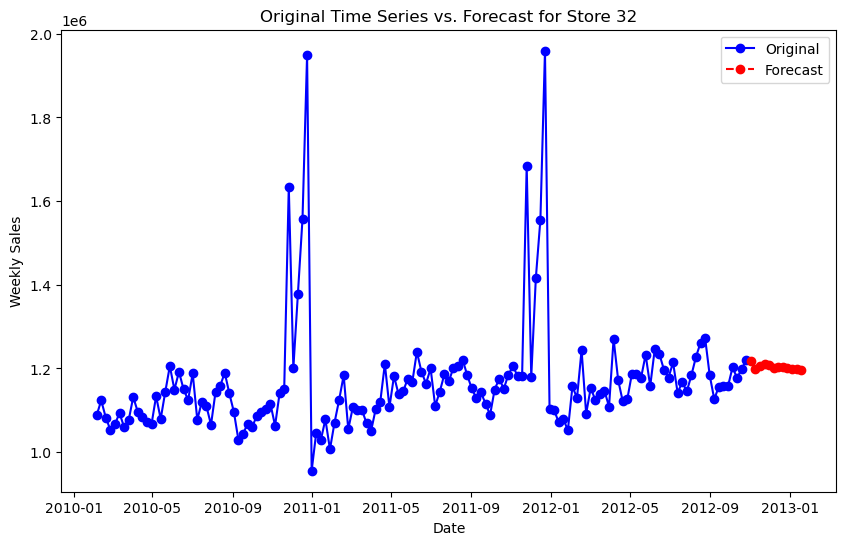

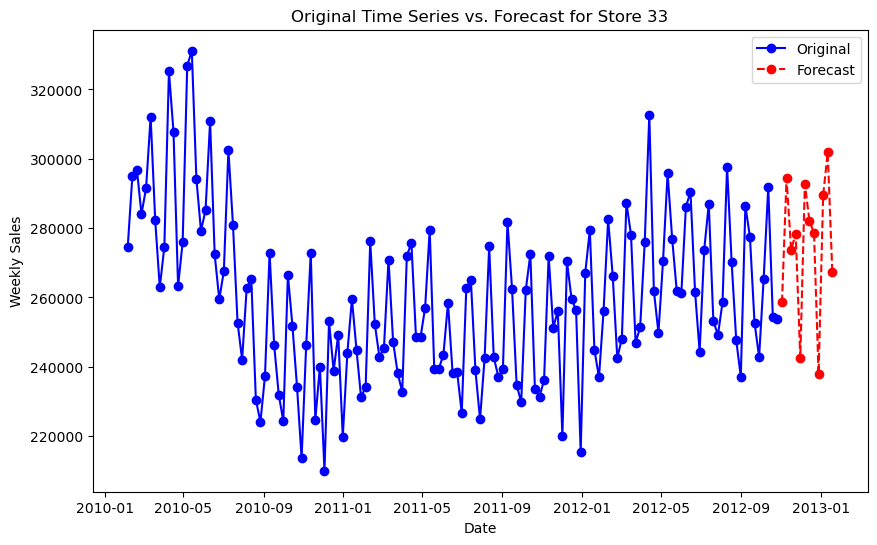

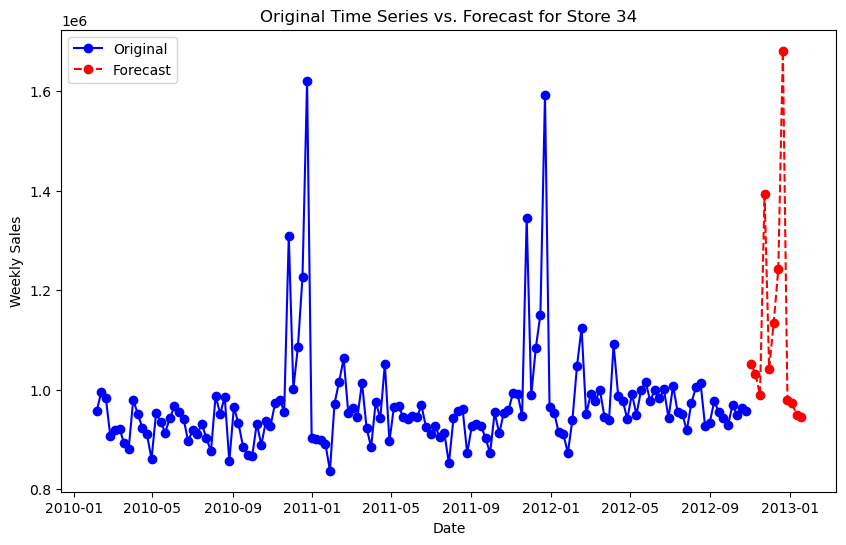

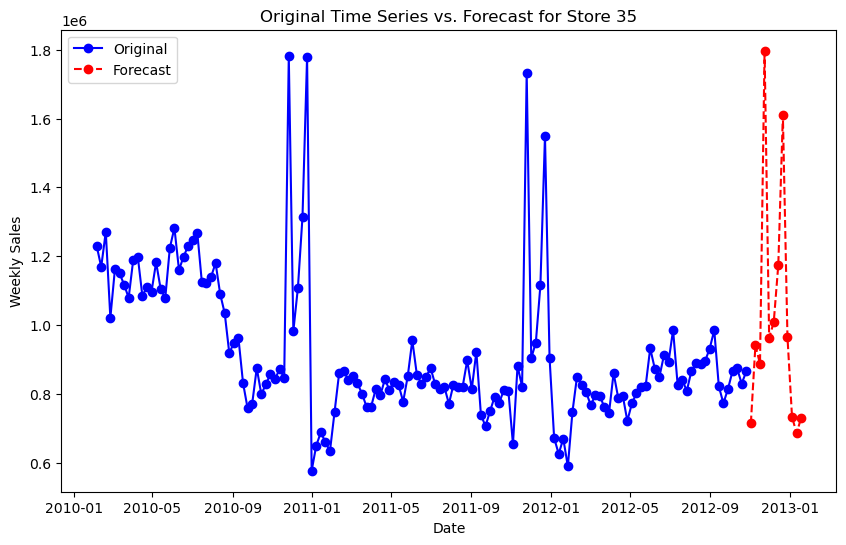

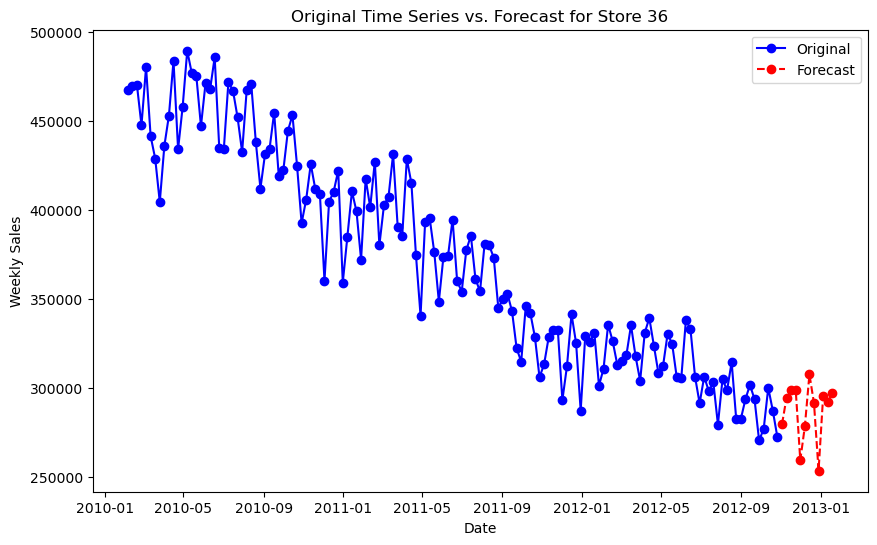

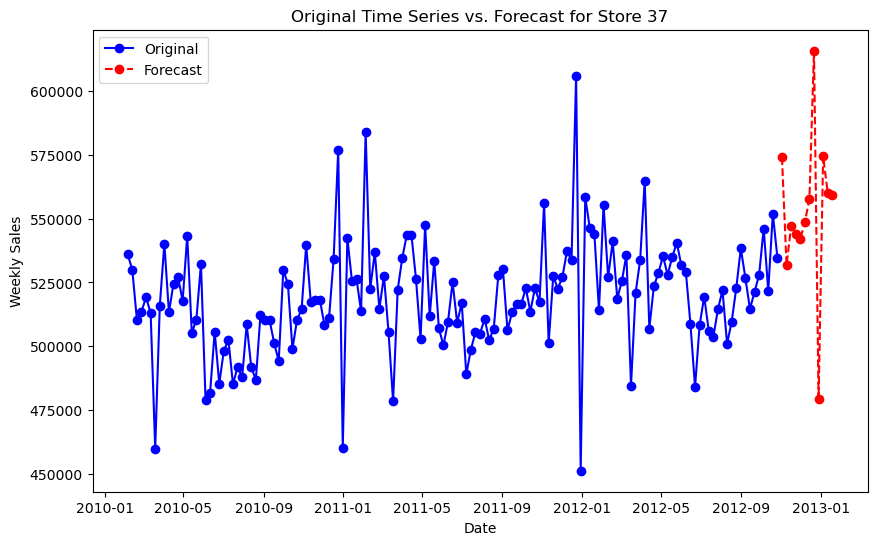

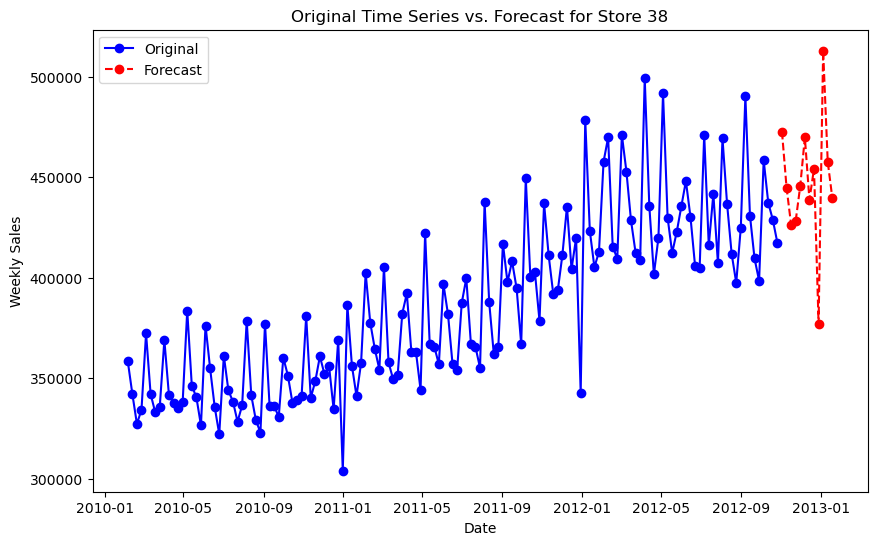

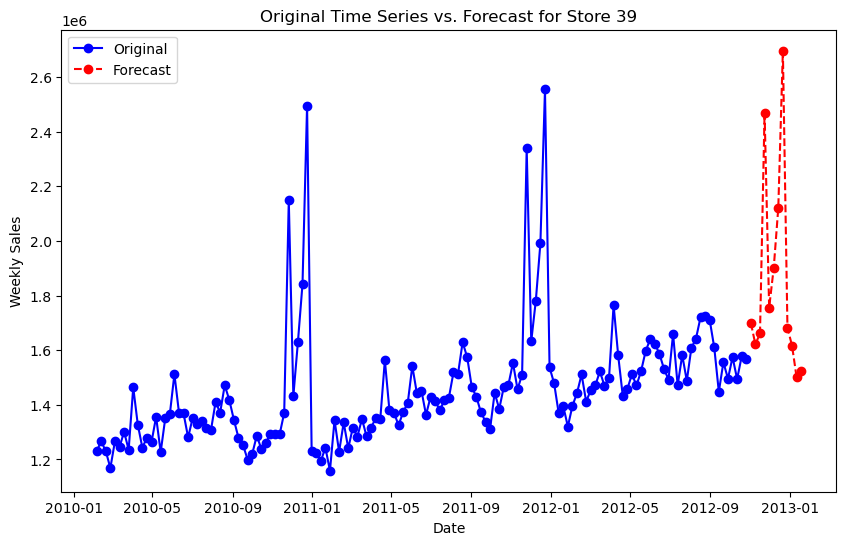

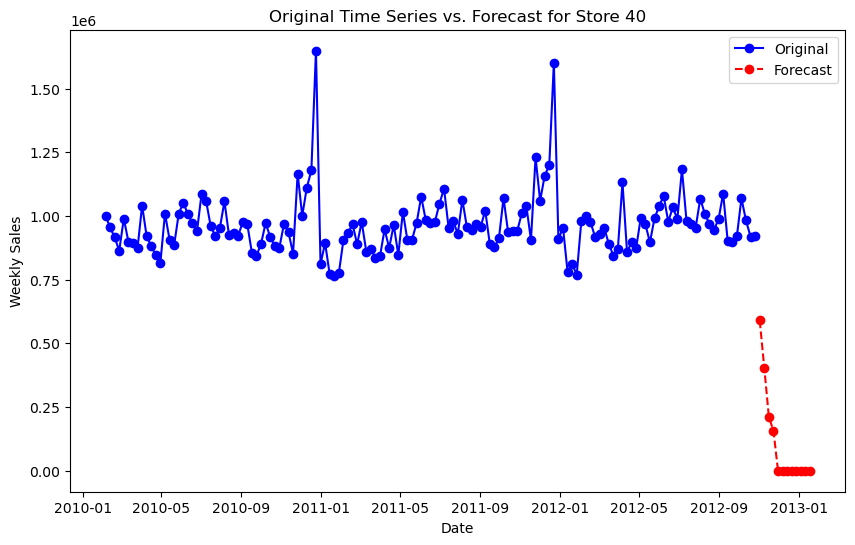

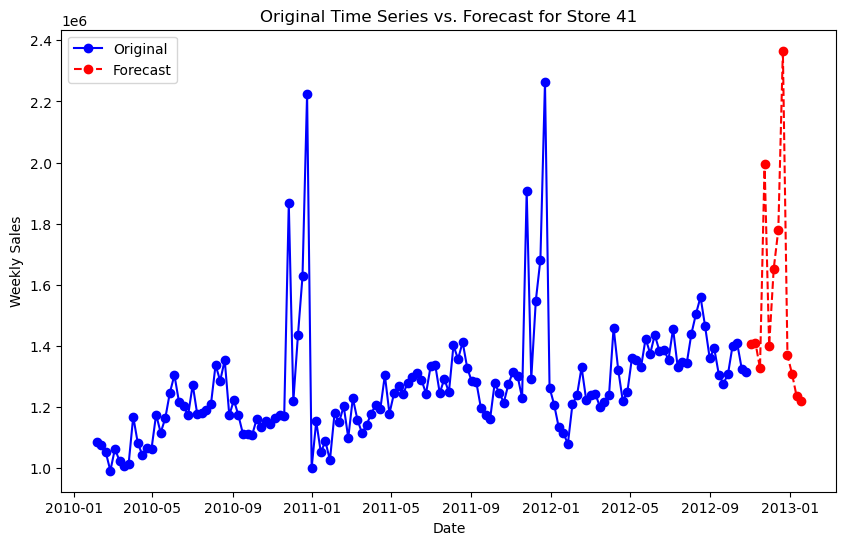

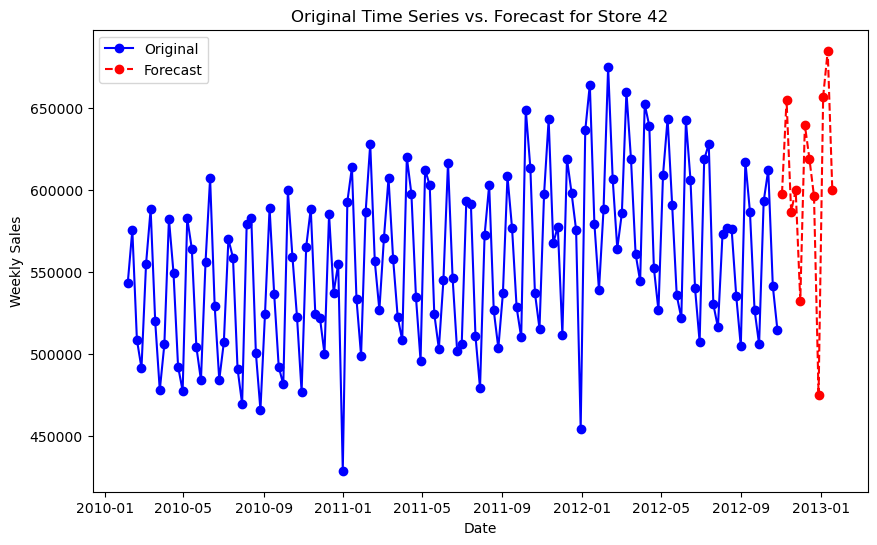

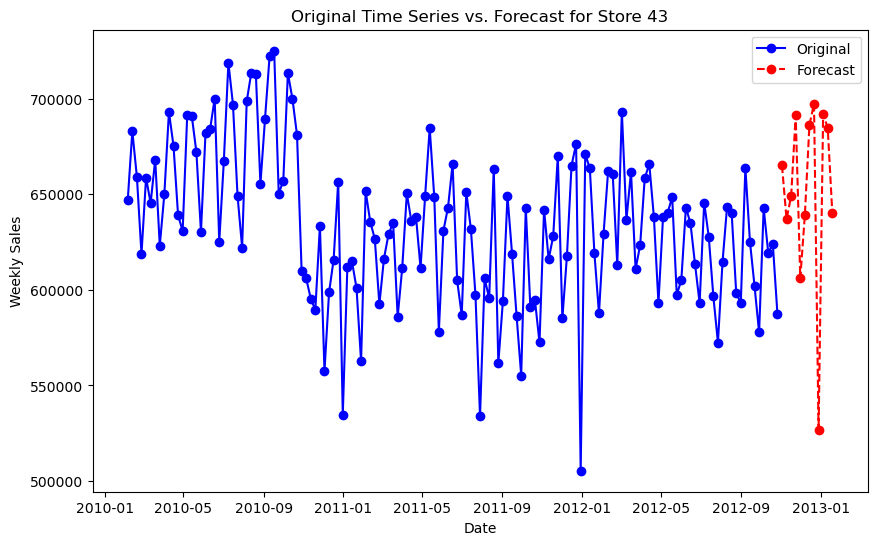

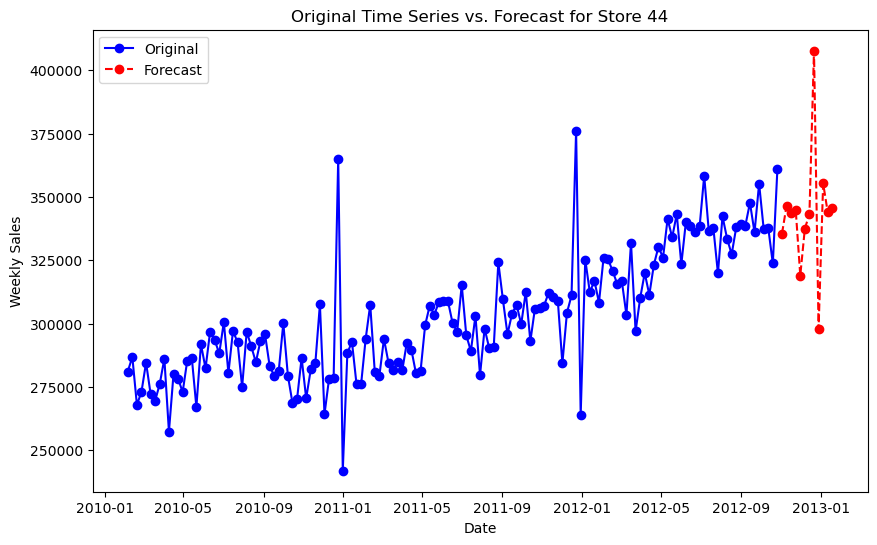

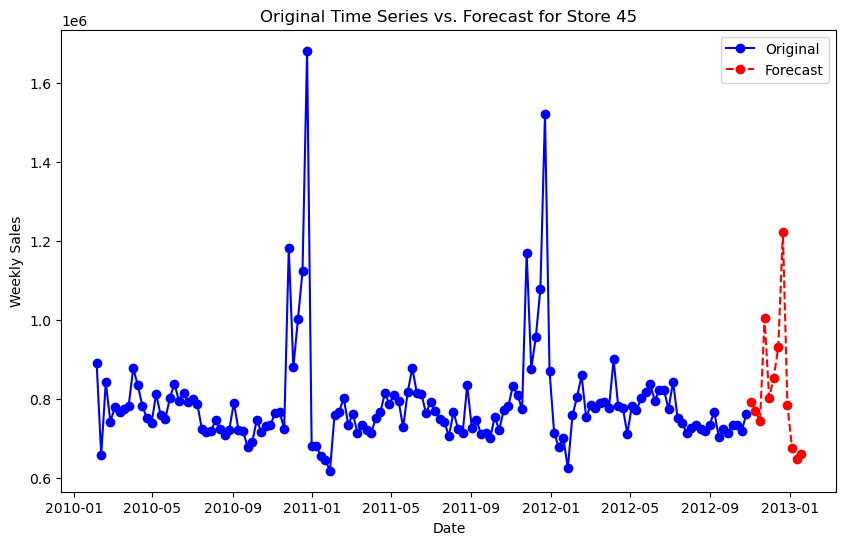

In [94]:
for store in range(1,46):
    d=data[data['Store'] == store][['Date','Weekly_Sales']]
    d.set_index('Date',inplace=True)
    plt.figure(figsize=(10, 6))
    plt.plot(d["Weekly_Sales"], label='Original', color='blue', marker='o', linestyle='-')
    plt.plot(forecast_df[store], label='Forecast', color='red', marker='o', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title(f'Original Time Series vs. Forecast for Store {store}')
    plt.legend()